Saving 2.png to 2 (1).png


<ipython-input-5-0a873a8b1388>:21: RuntimeWarning: overflow encountered in ubyte_scalars
  B2 = image[y, x] - window_max
<ipython-input-5-0a873a8b1388>:20: RuntimeWarning: overflow encountered in ubyte_scalars
  B1 = image[y, x] - window_min


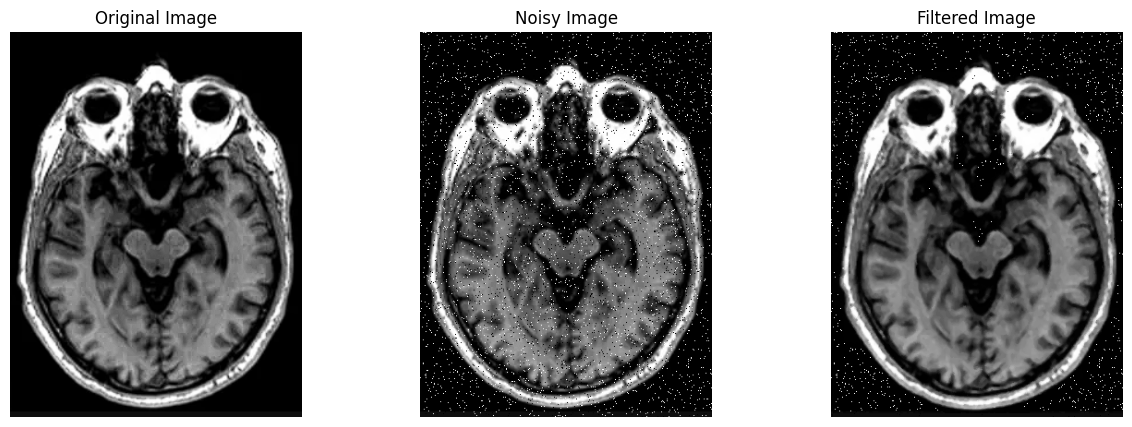

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab import files
from skimage.util import random_noise
from scipy.ndimage import median_filter

def adaptive_median_filter(image, max_window_size=7):
    def filter_window(window_size, x, y):
        half_size = window_size // 2
        window = padded_image[y:y+window_size, x:x+window_size]
        window_median = np.median(window)
        window_min = np.min(window)
        window_max = np.max(window)

        A1 = window_median - window_min
        A2 = window_median - window_max

        if A1 > 0 and A2 < 0:
            B1 = image[y, x] - window_min
            B2 = image[y, x] - window_max
            if B1 > 0 and B2 < 0:
                return image[y, x]
            else:
                return window_median
        else:
            return None

    rows, cols = image.shape
    padded_image = np.pad(image, max_window_size//2, mode='constant')

    filtered_image = np.zeros_like(image)
    for y in range(rows):
        for x in range(cols):
            window_size = 3
            while window_size <= max_window_size:
                result = filter_window(window_size, x, y)
                if result is not None:
                    filtered_image[y, x] = result
                    break
                window_size += 1
            if window_size > max_window_size:
                filtered_image[y, x] = image[y, x]

    return filtered_image

# Upload file
uploaded = files.upload()
filename = next(iter(uploaded))
image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Add salt and pepper noise
noisy_image = random_noise(image, mode='s&p', amount=0.05)
noisy_image = np.array(255 * noisy_image, dtype = np.uint8)

# Apply adaptive median filter
filtered_image = adaptive_median_filter(noisy_image)

# Display images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.show()
